<a href="https://colab.research.google.com/github/chandrakalagowda/BERT/blob/main/bertmodel_2_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [5]:
## To display multiple output from one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
!git clone https://github.com/chandrakalagowda/BERT.git

Cloning into 'BERT'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 15 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (15/15), 567.40 KiB | 3.00 MiB/s, done.


In [10]:
train = pd.read_pickle(r'/content/BERT/train.pkl')
valid = pd.read_pickle(r'/content/BERT/valid.pkl')
test =  pd.read_pickle(r'/content/BERT/test.pkl')


In [13]:
train.head()
train.shape

test.head()
test.shape

valid.head()
valid.shape


,text,intent
0,listen to westbam alumb allergic on google music,PlayMusic
1,add step to me to the 50 clásicos playlist,AddToPlaylist
2,i give this current textbook a rating value of...,RateBook
3,play the song little robin redbreast,PlayMusic
4,please add iris dement to my playlist this is ...,AddToPlaylist


(13084, 2)

,text,intent
0,add sabrina salerno to the grime instrumentals...,AddToPlaylist
1,i want to bring four people to a place that s ...,BookRestaurant
2,put lindsey cardinale into my hillary clinton ...,AddToPlaylist
3,will it snow in mt on june 13 2038,GetWeather
4,play signe anderson chant music that is newest,PlayMusic


(700, 2)

,text,intent
0,i d like to have this track onto my classical ...,AddToPlaylist
1,add the album to my flow español playlist,AddToPlaylist
2,add digging now to my young at heart playlist,AddToPlaylist
3,add this song by too poetic to my piano ballad...,AddToPlaylist
4,add this album to old school death metal,AddToPlaylist


(700, 2)

In [18]:
#print the unique intents
train.intent.unique()
print("/n")
test.intent.unique()
print("/n")
valid.intent.unique()

array(['PlayMusic', 'AddToPlaylist', 'RateBook', 'SearchScreeningEvent',
       'BookRestaurant', 'GetWeather', 'SearchCreativeWork'], dtype=object)

/n


array(['AddToPlaylist', 'BookRestaurant', 'GetWeather', 'PlayMusic',
       'SearchScreeningEvent', 'SearchCreativeWork', 'RateBook'],
      dtype=object)

/n


array(['AddToPlaylist', 'BookRestaurant', 'GetWeather', 'PlayMusic',
       'RateBook', 'SearchCreativeWork', 'SearchScreeningEvent'],
      dtype=object)

PlayMusic               1914
GetWeather              1896
BookRestaurant          1881
RateBook                1876
SearchScreeningEvent    1852
SearchCreativeWork      1847
AddToPlaylist           1818
Name: intent, dtype: int64

<Figure size 1200x800 with 0 Axes>

[Text(0, 0, 'PlayMusic'),
 Text(1, 0, 'AddToPlaylist'),
 Text(2, 0, 'RateBook'),
 Text(3, 0, 'SearchScreeningEvent'),
 Text(4, 0, 'BookRestaurant'),
 Text(5, 0, 'GetWeather'),
 Text(6, 0, 'SearchCreativeWork')]

Text(0.5, 1.0, 'Intent Distribution')

Text(0.5, 0, 'Intents')

Text(0, 0.5, 'Counts')

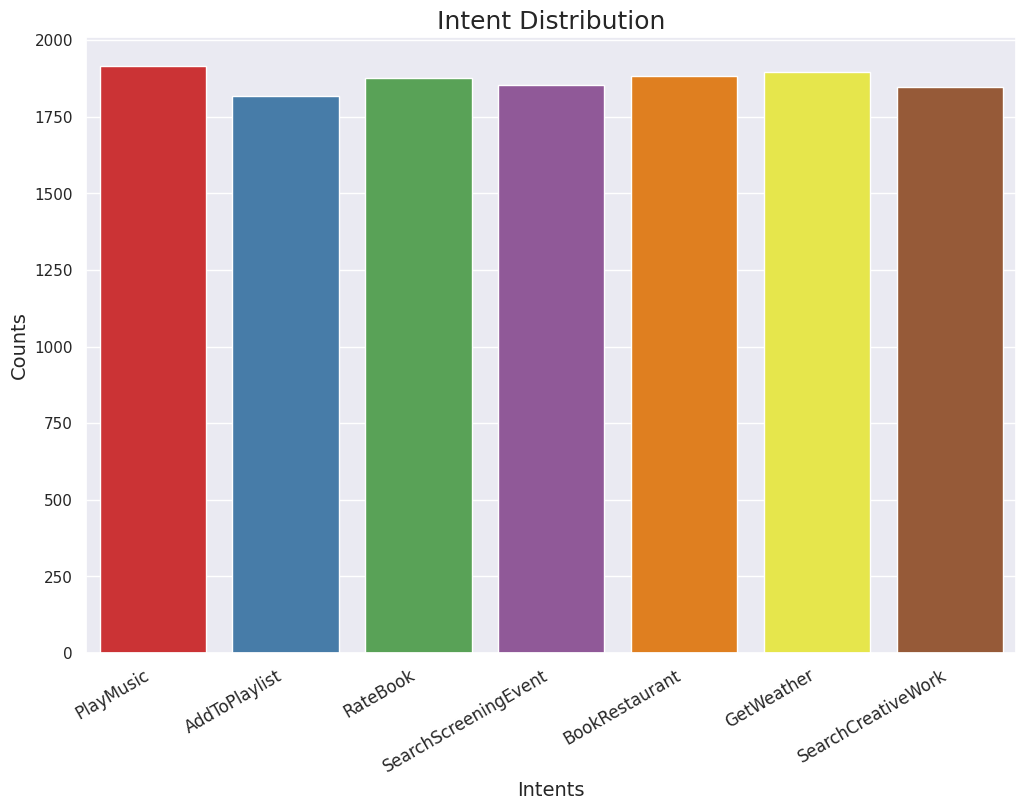

In [21]:
#print the count of intent
train.intent.value_counts()
#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
#Plot intents
#Countplot

sns.set()
plt.figure(figsize = (12, 8))
chart = sns.countplot(x = 'intent', data = train, palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 30, horizontalalignment='right', fontweight='light', fontsize='medium')
chart.set_title('Intent Distribution', fontsize = 18)
chart.set_xlabel('Intents', fontsize = 14)
chart.set_ylabel('Counts', fontsize = 14)
plt.show()

# Load BERT model



We can download bert model and all files related to bert model from below link.

We are going to use 12/768 (BERT-Base) model, which can be downloaded from this link. https://storage.googleapis.com/bert_models/2020_02_20/uncased_L-12_H-768_A-12.zip

BERT-Base has Uncased: 12-layer, 768-hidden, 12-heads, 110M parameters. Uncased means that the text has been lowercased before WordPiece tokenization, e.g., John Smith becomes john smith. The Uncased model also strips out any accent markers. Cased means that the true case and accent markers are preserved. Typically, the Uncased model is better unless you know that case information is important for our task.

We can download all 24 from here https://github.com/google-research/bert

We can get it from TensorFlow Hub also https://tfhub.dev/google/collections/bert/1

List files related uncased_L-12_H-768_A-12 model


In [ ]:
!ls ~/input/uncased_L-12_H-768_A-12
View bert_config.json

!ls ~/input/uncased_L-12_H-768_A-12/bert_config.json
{
“attention_probs_dropout_prob”: 0.1,
“hidden_act”: “gelu”,
“hidden_dropout_prob”: 0.1,
“hidden_size”: 768,
“initializer_range”: 0.02,
“intermediate_size”: 3072,
“max_position_embeddings”: 512,
“num_attention_heads”: 12,
“num_hidden_layers”: 12,
“type_vocab_size”: 2,
“vocab_size”: 30522
}

Declare bert configuration files
import os
modelInputFolder = '~/input/'
bert_model_name="uncased_L-12_H-768_A-12"
bert_ckpt_dir = os.path.join(modelInputFolder, bert_model_name)
bert_ckpt_file = os.path.join(bert_ckpt_dir, "bert_model.ckpt")
bert_config_file = os.path.join(bert_ckpt_dir, "bert_config.json")
print(bert_ckpt_dir)
print(bert_ckpt_file)
print(bert_config_file)
Tokenize vocabulary
View vocab.txt file content with tail command

!head ~/input/uncased_L-12_H-768_A-12/vocab.txt
Load vocab.txt file
vocab_file = os.path.join(bert_ckpt_dir, "vocab.txt")
print(vocab_file)
Tokenize vocab with FullTokenizer
#Import FullTokenizer from bert_tokenization
from bert.tokenization.bert_tokenization import FullTokenizer
Tokenization is the process of dividing text into pieces such as words, keywords, phrases, symbols and other elements. These pieces are called tokens.

tokenizer = FullTokenizer(vocab_file)
print(tokenizer)
tokenizer.convert_tokens_to_ids: converts a string in a sequence of ids (integer), using the tokenizer.

tokens = tokenizer.tokenize("Hello, How are you?")
token_ids = tokenizer.convert_tokens_to_ids(tokens)
print(tokens)
print(token_ids)
Output:

[‘hello’, ‘,’, ‘how’, ‘are’, ‘you’, ‘?’]
[7592, 1010, 2129, 2024, 2017, 1029]

['hello', ',', 'how', 'are', 'you', '?']
[7592, 1010, 2129, 2024, 2017, 1029]
Get intent classes
classes = train.intent.unique().tolist()
print(classes)
Preprocess data
Create class
class IntentDataManager:
    
    def __init__(self):
        print("IntentDataManager class is called")
        
        pass
    
    pass
#class IntentDataManager:
data = IntentDataManager()
print(data)
Add input parameters to the constructor
Pass train, test, tokenizer, classes and max_seq_len as inputs of class IntentDataManager

max_seq_len = 192
class IntentDataManager:
    
    def __init__(self, train, test, tokenizer: FullTokenizer, classes, max_seq_len):
        
        #declare tokenizer and classes as a class members
        self.tokenizer = tokenizer
        self.classes = classes
        
        print(f"train shape: {train.shape}")
        print(f"test shape: {test.shape}")
        print(f"tokenizer: {self.tokenizer}")
        print(f"intent_classes: {self.classes}")
        print(f"max_seq_len: {max_seq_len}")
        
        pass
    
    pass
#class IntentDataManager:
data = IntentDataManager(train, test, tokenizer, classes, max_seq_len)
print(data)
Sort train and test data by length of text
Sort text column by length of train data. The str.len() function is used to compute the length of each element in the Series/Index.

len_of_text = train['text'].str.len()
print(len_of_text)
Pandas sort_values() function sorts a data frame in Ascending or Descending order of passed Column.

#sort text by length
sorted_indexes = len_of_text.sort_values()
print(sorted_indexes)
Output:

7713 8
10016 8
9189 10
3195 10
5452 10
…
10951 136
1290 141
2674 149
2603 150
7258 186
Name: text, Length: 13784, dtype: int64

Sort length of text by index

#Sort length of text by index
sorted_indexes = len_of_text.sort_values().index
print(sorted_indexes)
Output:

Int64Index([ 7713, 10016, 9189, 3195, 5452, 4137, 2222, 12186, 10600,
2869,
…
3324, 5670, 9992, 11405, 9919, 10951, 1290, 2674, 2603,
7258],
dtype=’int64', length=13784)

#pass dataframe as input in lambda function 
#sort values by length of text index
#and return the new index of sorted_indexes 
sort_by_length_text = lambda input_df: input_df.reindex( 
    input_df['text'].str.len().sort_values().index 
)
print(sort_by_length_text)
class IntentDataManager:
    
    def __init__(self, train, test, tokenizer: FullTokenizer, classes, max_seq_len):
        
        #declare tokenizer and classes as a class members
        self.tokenizer = tokenizer
        self.classes = classes
        
        '''
        print(f"train shape: {train.shape}")
        print(f"test shape: {test.shape}")
        print(f"tokenizer: {self.tokenizer}")
        print(f"intent_classes: {self.classes}")
        print(f"max_seq_len: {max_seq_len}")
        '''
        
        #sort train and test data by length of text
        train, test = map(sort_by_length_text, [train, test])
        
        print(f"train shape: {train.shape} \n\n {train.head()}")
        print(f"\n\ntest shape: {test.shape} \n\n {test.head()}")
        
        
        pass
    
    pass
#class IntentDataManager:
data = IntentDataManager(train, test, tokenizer, classes, max_seq_len)
print(data)
Preprocess train and test data
To use a pre-trained BERT model, we need to convert the input data into an appropriate format so that each sentence can be sent to the pre-trained model to obtain the corresponding embedding.

BERT embeddings are trained with two training tasks:

1. Classification Task: to determine which category the input sentence should fall into
2. Next Sentence Prediction Task: to determine if the second sentence naturally follows the first sentence.

The [CLS] and [SEP] Tokens:

For the classification task, a single vector representing the whole input sentence is needed to be fed to a classifier. In BERT, the decision is that the hidden state of the first token is taken to represent the whole sentence. To achieve this, an additional token has to be added manually to the input sentence. The token [CLS] is chosen for this purpose.

In the “next sentence prediction” task, we need to inform the model where does the first sentence end, and where does the second sentence begin. Hence, another artificial token, [SEP], is introduced. If we are trying to train a classifier, each input sample will contain only one sentence (or a single text input). In that case, the [SEP] token will be added to the end of the input text.

In summary, to preprocess the input text data, the first thing we will have to do is to add the [CLS] token at the beginning, and the [SEP] token at the end of each input text.


source
class IntentDataManager:
    
    def __init__(self, train, test, tokenizer: FullTokenizer, classes, max_seq_len):
        
        #declare tokenizer and classes as a class members
        self.tokenizer = tokenizer
        self.classes = classes
        self.max_seq_len = 0
        
         
        #sort train and test data by length of text
        train, test = map(sort_by_length_text, [train, test])
        
     
        #call preprocessData function
        (train_X, train_y), (test_X, test_y)  =  map(self.preprocessData, [train, test])
        
        print(f"train_X shape: {train_X.shape}")
        print(f"train_y shape: {train_y.shape}")
        print(f"\ntrain_X: \n{train_X[:5]}")
        print(f"\ntrain_y: \n{train_y[:5]}")
print(f"test_X shape: {test_X.shape}")
        print(f"test_y shape: {test_y.shape}")
        print(f"\ntest_X: \n{test_X[:5]}")
        print(f"\ntest_y: \n{test_y[:5]}")
        
        
        pass
   def preprocessData(self, df):
        
        x, y = [], []
        for idx, row in df[:5].iterrows():
            text = row['text']
            label = row['intent']
            
            #convert text to tokens
            tokens = self.tokenizer.tokenize(text)
            tokens = ["[CLS]"] + tokens + ["[SEP]"] 
          
            print(f"tokens = {tokens}")
            
            #convert tokens to ids
            token_ids = self.tokenizer.convert_tokens_to_ids(tokens)
            print(f"token_ids = {token_ids}")
    
            #append tokens_ids to x
            x.append(token_ids)
            #get maxmium sequence length
            self.max_seq_len = max(self.max_seq_len, len(token_ids))
            print(f"max_seq_len = {self.max_seq_len}")
            
            
            print(f"classes = {self.classes}")
            print(f"label = {label}")
            
            
            #get index of class label
            class_label_index = self.classes.index(label)
            print(f"class_label_index = {class_label_index}")
            
            #append index of class label to y
            y.append(class_label_index)
            pass
        
        
        arrX = np.array(x)
        arrY = np.array(y)
        print(f"\narrX = {arrX}")
        print(f"\narrY = {arrY}")
        
        return arrX, arrY
            
            
        pass
    
    pass
#class IntentDataManager:
data = IntentDataManager(train, test, tokenizer, classes, max_seq_len)
print(data)
Add padding to the sequence
The BERT model receives a fixed length of sentence as input. If sentences are shorter than maximum length, we will have to add paddings to the sentences to make up the length.

class IntentDataManager:
    
    def __init__(self, train, test, tokenizer: FullTokenizer, classes, max_seq_len):
        
        #declare tokenizer and classes as a class members
        self.tokenizer = tokenizer
        self.classes = classes
        self.max_seq_len = 0
        
         
        #sort train and test data by length of text
        train, test = map(sort_by_length_text, [train, test])
        
     
        #call preprocessData function
        (train_X, train_y), (test_X, test_y)  =  map(self.preprocessData, [train, test])
        
        '''
        print(f"train_X shape: {train_X.shape}")
        print(f"train_y shape: {train_y.shape}")
        print(f"\ntrain_X: \n{train_X[:5]}")
        print(f"\ntrain_y: \n{train_y[:5]}")
        print(f"test_X shape: {test_X.shape}")
        print(f"test_y shape: {test_y.shape}")
        print(f"\ntest_X: \n{test_X[:5]}")
        print(f"\ntest_y: \n{test_y[:5]}")
        
        '''
        print(f"\nmax_seq_len = {self.max_seq_len}")
        
        #pad x and y to max_seq_len
        train_X = self.padSequences(train_X)
        test_X = self.padSequences(test_X)
                
        print(f"\ntrain_X: \n{train_X[:5]}")
        print(f"\ntest_X: \n{test_X[:5]}")
        
        pass
   def preprocessData(self, df):
        
        x, y = [], []
        for idx, row in df[:5].iterrows():
            text = row['text']
            label = row['intent']
            
            #convert text to tokens
            tokens = self.tokenizer.tokenize(text)
            tokens = ["[CLS]"] + tokens + ["[SEP]"] 
          
           
            #convert tokens to ids
            token_ids = self.tokenizer.convert_tokens_to_ids(tokens)
    
            #append tokens_ids to x
            x.append(token_ids)
            #get maxmium sequence length
            self.max_seq_len = max(self.max_seq_len, len(token_ids))
            
           
            #get index of class label
            class_label_index = self.classes.index(label)
            
            #append index of class label to y
            y.append(class_label_index)
            pass
        
        
        arrX = np.array(x)
        arrY = np.array(y)
        
        return arrX, arrY
        pass
        
    def padSequences(self, arr):
        
        #print("arr", arr)
        newArr = []
        for item in arr:
            
            #print("item", item)
            #calculate the shortfall of sequence length
            shortfall = self.max_seq_len - len(item)
            
            #add zero to shortfall
            item = item + [0] * (shortfall)
            #print(newItem)
            
            newArr.append(item)
            pass
        
        return np.array(newArr)
        pass
       
    
    pass
#class IntentDataManager:
data = IntentDataManager(train, test, tokenizer, classes, max_seq_len)
print(data)
Output:

max_seq_len = 7

train_X:
[[ 101 2377 3769 102 0 0 0]
[ 101 2377 6574 102 0 0 0]
[ 101 2377 1062 6767 2080 4160 102]
[ 101 10882 26876 8294 102 0 0]
[ 101 2377 1062 6767 2080 4160 102]]

test_X:
[[ 101 2424 3684 4400 102 0 0]
[ 101 2377 5730 4215 10781 102 0]
[ 101 2424 3185 2335 102 0 0]
[ 101 2424 3185 2335 102 0 0]
[ 101 2377 1996 16021 10085 4958 102]]
<__main__.IntentDataManager object at 0x7fd8730da210>

Full class code
class IntentDataManager:
    
    def __init__(self, train, test, tokenizer: FullTokenizer, classes, max_seq_len):
        
        #declare tokenizer and classes as a class members
        self.tokenizer = tokenizer
        self.classes = classes
        self.max_seq_len = 0
        
         
        #sort train and test data by length of text
        train, test = map(sort_by_length_text, [train, test])
     
        #call preprocessData function
        (self.train_X, self.train_y), (self.test_X, self.test_y)  =  map(self.preprocessData, [train, test])
        
        self.max_seq_len = min(self.max_seq_len, max_seq_len)
        self.train_X, self.test_X = map(self.padSequences, [self.train_X, self.test_X])
        
        pass
    def preprocessData(self, df):
        
        x, y = [], []
        for idx, row in df.iterrows():
            text = row['text']
            label = row['intent']
            
            #convert text to tokens
            tokens = self.tokenizer.tokenize(text)
            tokens = ["[CLS]"] + tokens + ["[SEP]"] 
          
           
            #convert tokens to ids
            token_ids = self.tokenizer.convert_tokens_to_ids(tokens)
    
            #append tokens_ids to x
            x.append(token_ids)
            #get maxmium sequence length
            self.max_seq_len = max(self.max_seq_len, len(token_ids))
            
           
            #get index of class label
            class_label_index = self.classes.index(label)
            
            #append index of class label to y
            y.append(class_label_index)
            pass
        
        
        arrX = np.array(x)
        arrY = np.array(y)
        
        return arrX, arrY
        pass
    
        
    def padSequences(self, arr):
        
        #print("arr", arr)
        newArr = []
        for item in arr:
            #print("item", item)
            #calculate the shortfall of sequence length
            shortfall = self.max_seq_len - len(item)
            
            #add zero to shortfall
            #zerosToAdd = np.zeros(shortfall, dtype = np.int32)
            #newItem = np.append(item, zerosToAdd)
            item = item + [0] * (shortfall)
            #print(newItem)
            
            newArr.append(np.array(item))
            pass
        
        return np.array(newArr)
        pass
       
    
    pass
#class IntentDataManager:
data = IntentDataManager(train, test, tokenizer, classes, max_seq_len)
#print(data)
Print train_X and test_X

print(data.train_X.shape)
print(data.train_X[0])
print(data.test_X[0])
Create custom model
Import libraries
import tensorflow as tf
from bert.loader import StockBertConfig, map_stock_config_to_params
from bert import BertModelLayer
from tensorflow import keras
from bert.loader import load_stock_weights
Create a function
#create customModel function
def customModel():
    print("Custom model")
pass
model = customModel()
print(model)
Read bert configuration file
#create custom_model function
def customModel(max_seq_len, 
                        bert_config_file, 
                        bert_ckpt_file):
    
    #read config file with special reader tf.io.gfile.GFile
    with tf.io.gfile.GFile(bert_config_file, "r") as reader:
        #read data as json string
        customConfig =    StockBertConfig.from_json_string(reader.read())
        print(f"customConfig = {customConfig}")
        
        #load all params for our model
        #If params not in customConfig, defauls value is used
        bert_params = map_stock_config_to_params(customConfig)
        print(f"\nbert_params = {bert_params}")
        
        #print(f"\nbert_params.adapter_size = {bert_params.adapter_size}")
        bert_params.adapter_size = None
        print(f"\nbert_params.adapter_size = {bert_params.adapter_size}")
            
        pass
    
    pass
model = customModel(data.max_seq_len, 
                            bert_config_file, 
                            bert_ckpt_file)
print(model)
Create bert model layer from bert configuration parameters
#create custom_model function
def customModel(max_seq_len, 
                        bert_config_file, 
                        bert_ckpt_file):
    
    #read config file with special reader tf.io.gfile.GFile
    with tf.io.gfile.GFile(bert_config_file, "r") as reader:
        #read data as json string
        customConfig = StockBertConfig.from_json_string(reader.read())
        print(f"customConfig = {customConfig}")
        
        #load all params for our model
        #If params not in customConfig, defauls value is used
        bert_params = map_stock_config_to_params(customConfig)
        print(f"\nbert_params = {bert_params}")
        
        #print(f"\nbert_params.adapter_size = {bert_params.adapter_size}")
        bert_params.adapter_size = None
        print(f"\nbert_params.adapter_size = {bert_params.adapter_size}")
            
        #create bert layer
        bert_layer = BertModelLayer.from_params(bert_params, name="bert_layer")
        print(f"\nbert_layer = {bert_layer}")
        
        pass
    
    pass
model = customModel(data.max_seq_len, 
                            bert_config_file, 
                            bert_ckpt_file)
print(model)
Create Keras model and add input and output layers in that
#create customModel
def customModel(max_seq_len, 
                        bert_config_file, 
                        bert_ckpt_file):
    
    #create input layer
    input_layer = keras.layers.Input(
                          shape=(max_seq_len, ), 
                          dtype='int32', 
                          name="input_layer")
    #read config file with special reader tf.io.gfile.GFile
    with tf.io.gfile.GFile(bert_config_file, "r") as reader:
        #read data as json string
        customConfig = StockBertConfig.from_json_string(reader.read())
        print(f"customConfig = {customConfig}")
        
        #load all params for our model
        #If params not in customConfig, defauls value is used
        bert_params = map_stock_config_to_params(customConfig)
        print(f"\nbert_params = {bert_params}")
        
        #print(f"\nbert_params.adapter_size = {bert_params.adapter_size}")
        bert_params.adapter_size = None
        print(f"\nbert_params.adapter_size = {bert_params.adapter_size}")
            
        #create bert layer
        bert_layer = BertModelLayer.from_params(bert_params, name="bert_layer")
        print(f"\nbert_layer = {bert_layer}")
        
        pass
    
    
    #process input through bert_layer
    bert_output = bert_layer(input_layer)
    print(f"bert shape = {bert_output.shape}")
    #create model with all layers
    custom_model = keras.Model(inputs = input_layer, outputs = bert_output)
    custom_model.build(input_shape = (None, max_seq_len))
    #load weights
    load_stock_weights(bert_layer, bert_ckpt_file)
    
    return custom_model
    pass
pass
model = customModel(data.max_seq_len, 
                            bert_config_file, 
                            bert_ckpt_file)
print(model)
Add hidden layers to the model
max_seq_len = 192
#create customModel
def customModel(max_seq_len, 
                        bert_config_file, 
                        bert_ckpt_file):
    
    #create input layer
    input_layer = keras.layers.Input(
                          shape=(max_seq_len, ), 
                          dtype='int32', 
                          name="input_layer")
    #read config file with special reader tf.io.gfile.GFile
    with tf.io.gfile.GFile(bert_config_file, "r") as reader:
        #read data as json string
        customConfig = StockBertConfig.from_json_string(reader.read())
        print(f"customConfig = {customConfig}")
        
        #load all params for our model
        #If params not in customConfig, defauls value is used
        bert_params = map_stock_config_to_params(customConfig)
        print(f"\nbert_params = {bert_params}")
        
        #print(f"\nbert_params.adapter_size = {bert_params.adapter_size}")
        bert_params.adapter_size = None
        print(f"\nbert_params.adapter_size = {bert_params.adapter_size}")
            
        #create bert layer
        bert_layer = BertModelLayer.from_params(bert_params, name="bert_layer")
        print(f"\nbert_layer = {bert_layer}")
        
        pass
    
     
    #process input through bert_layer
    bert_output = bert_layer(input_layer)
    print(f"bert shape = {bert_output.shape}")
    
    #add hidden layer1
    hidden_output1 = keras.layers.Lambda(lambda seq: seq[:, 0, :])(bert_output)
    print(f"hidden_output1 = {hidden_output1.shape}")
    
    #dropout layer 1
    dropout_1 = keras.layers.Dropout(0.5)(hidden_output1)
    print(f"dropout_output1 = {hidden_output1.shape}")
    #add hidden layer2
    hidden_output2 = keras.layers.Dense(units=768, activation="tanh")(dropout_1)
    #print(f"hidden_output2 = {hidden_output2.shape}")
    
    #dropout layer 2
    dropout_2 = keras.layers.Dropout(0.5)(hidden_output2)
    print(f"dropout_output2 = {hidden_output2.shape}")
    
    final_output = keras.layers.Dense(units=len(classes), activation="softmax")(dropout_2)
    print(f"final_output = {final_output.shape}")
    #create model with all layers
    model = keras.Model(inputs = input_layer, outputs = final_output)
    model.build(input_shape = (None, max_seq_len))
    
    load_stock_weights(bert_layer, bert_ckpt_file)
    
    return model
    pass
pass
model = customModel(data.max_seq_len, 
                            bert_config_file, 
                            bert_ckpt_file)
print(model)
Full custom model
#create customModel
def customModel(max_seq_len, 
                        bert_config_file, 
                        bert_ckpt_file):
    
    #create input layer
    input_layer = keras.layers.Input(
                          shape=(max_seq_len, ), 
                          dtype='int32', 
                          name="input_layer")
    #read config file with special reader tf.io.gfile.GFile
    with tf.io.gfile.GFile(bert_config_file, "r") as reader:
        #read data as json string
        customConfig = StockBertConfig.from_json_string(reader.read())
        
        #load all params for our model
        #If params not in customConfig, defauls value is used
        bert_params = map_stock_config_to_params(customConfig)
        
        #print(f"\nbert_params.adapter_size = {bert_params.adapter_size}")
        bert_params.adapter_size = None
            
        #create bert layer
        bert_layer = BertModelLayer.from_params(bert_params, name="bert_layer")
        
        pass
    
     
    #process input through bert_layer
    bert_output = bert_layer(input_layer)
    
    #add hidden layer1
    hidden_output1 = keras.layers.Lambda(lambda seq: seq[:, 0, :])(bert_output)
    
    #dropout layer 1
    dropout_1 = keras.layers.Dropout(0.5)(hidden_output1)
    #add hidden layer2
    hidden_output2 = keras.layers.Dense(units=768, activation="tanh")(dropout_1)
    
    #dropout layer 2
    dropout_2 = keras.layers.Dropout(0.5)(hidden_output2)
    
    final_output = keras.layers.Dense(units=len(classes), activation="softmax")(dropout_2)
    #create model with all layers
    model = keras.Model(inputs = input_layer, outputs = final_output)
    model.build(input_shape = (None, max_seq_len))
    
    load_stock_weights(bert_layer, bert_ckpt_file)
    
    return model
    pass
pass
Call model
model = customModel(data.max_seq_len, bert_config_file, bert_ckpt_file)
print(model)
Model summary
model.summary()
Plot model
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='bert_model.png')

Compile model
model.compile(
    optimizer=keras.optimizers.Adam(1e-5),
    
    # Loss function to minimize   loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")]
)
Train the model
fit() function will train the model by slicing the data into “batches” of size “batch_size”, and repeatedly iterating over the entire dataset for a given number of “epochs”.

x = data.train_X
print(x[0])
y = data.train_y
print(y[:5])
history = model.fit(
  x, 
  y,
  validation_split = 0.1,
  batch_size = 16,
  shuffle = True,
  epochs = 5
)
Print history
history.history
Output:

{‘loss’: [1.3076690435409546,
1.184829592704773,
1.180479884147644,
1.1782810688018799,
1.176334023475647],
‘acc’: [0.8722289204597473,
0.9820233583450317,
0.9855703115463257,
0.9876662492752075,
0.9895203709602356],
‘val_loss’: [1.18868088722229,
1.1690980195999146,
1.169758677482605,
1.1684192419052124,
1.1715320348739624],
‘val_acc’: [0.9775199294090271,
0.9963741898536682,
0.9956490397453308,
0.9970993399620056,
0.9934735298156738]}

Visualize loss and accuracy
Plot loss during training
plt.figure(figsize = (10, 6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend(['train', 'test'])
plt.title('Loss during training')
plt.show();

Loss during training
Plot accuracy during training
plt.figure(figsize = (10, 6))
plt.plot(history.history['acc'], label = 'train')
plt.plot(history.history['val_acc'], label = 'test')
plt.legend(['train', 'test'])
plt.title('Accuracy during training')
plt.show();

Accuracy during training
Evaluate the model
Evaluate the model on the test data by evaluate()

train_loss, train_accuracy = model.evaluate(data.train_X, data.train_y)
test_loss, test_accuracy = model.evaluate(data.test_X, data.test_y, batch_size = 16)
print("train_loss, train_accuracy:", train_accuracy)
print("test_loss, test_accuracy:", test_accuracy)
Predict
#predict test data
y_pred = model.predict(data.test_X).argmax(axis = -1)
print(y_pred.shape)
print(y_pred[:10])
Output:

(700,)
array([6, 0, 3, 3, 6, 0, 0, 0, 1, 5])

Print the class label of prediction
for label in y_pred[:10]:
    print(classes[label])
    pass
Output:

SearchCreativeWork
PlayMusic
SearchScreeningEvent
SearchScreeningEvent
SearchCreativeWork
PlayMusic
PlayMusic
PlayMusic
AddToPlaylist
GetWeather

Compute classification report
from sklearn.metrics import classification_report
print(classification_report(data.test_y, y_pred, target_names = classes))
Predict intent with new sentences
sentences = [
    "Play party song",
    "Dance song",
    "How is weather today"
]
#tokenize sentences
tokens = map(tokenizer.tokenize, sentences)
#add [CLS] and [SEP] Tokens  
tokens = map(lambda token: ["[CLS]"] + token + ["[SEP]"], tokens)
#convert each tokens to ids
token_ids = list(map(tokenizer.convert_tokens_to_ids, tokens))
#add padding
token_ids = map(lambda tids: tids + [0] * (data.max_seq_len-len(tids)), token_ids)
token_ids = np.array(list(token_ids))
#predict
predictions = model.predict(token_ids).argmax(axis = -1)
for text, label in zip(sentences, predictions):
    print("Text:", text, "\nIntent:", classes[label])
    print()
Output:

Text: Play party song
Intent: PlayMusic

Text: Dance song
Intent: SearchCreativeWork

Text: How is weather today
Intent: GetWeather

Bert
Intent Recognition
Machine Learning Bert
Intent Recognition Bert
Pre Trained Model Bert
75


5




